In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#Write the linear hypothesis function.
def h(x, theta):
    theta=np.vstack(theta)
    return np.dot(x,theta)

In [3]:
#Write the Mean Squared Error function between the predicted values and the labels.
def mean_squared_error(y_predicted, y_label):
    return ((y_predicted - y_label)**2).mean()

In [4]:
#Write a class LeastSquareRegression to calculate the θ feature weights and make predictions.
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None  
        
    def fit(self, X, y):
        self.theta_  = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        return h(X,self.theta_)

In [5]:
#Write a function which adds one to each instance
def bias_column(X):
    return np.hstack((np.ones((np.size(X, 0), 1)), X))

In [6]:
#Plot the two set of points superimposed
def my_plot(X, y, y_new):
    plt.plot(X, y_new, 'c')
    plt.plot(X, y, 'mo')
    plt.show()

In [7]:
#write a class to perform the gradient descent optimization
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = [start]
    
    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        # 2. Append the new value to history
        # Does not return anything

        new_value = self.current_ - (self.learning_rate_ * fprime(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)
        
    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()
            
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

In [8]:
#Write the f function
def f(x):
    f_ = lambda x: 3 + np.matmul(np.transpose(x - np.array([2, 6])), (x - np.array([2, 6])))
    return f_(x)

In [9]:
#Write the fprime function
def fprime(x):
    f_prime= lambda x: 2*(x - np.array([2, 6]))
    return f_prime(x)

In [10]:
#Implement the batch gradient descent
def gradient_descent(X, m, y, theta_start, iterations = 100, learning_rate = 0.1):
    for _ in range(iterations):
        grad_vector = 2/m * np.dot(np.transpose(X), (np.subtract(np.dot(X, theta_start), y)))
        theta_start = theta_start - learning_rate*grad_vector
    return theta_start

In [11]:
#Function which plots for the first 10-20 steps the line represented by theta
def plot_line(rate):    
    theta = gradient_descent(X_new, 100, y, theta_start, learning_rate = rate)
    print(theta)
    y_pred = h(X_new, theta)

    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r-")
    plt.grid()

In [12]:
#Check the linear hypothesis function.
x = np.array([[1,1],[1,2],[1,3]])
theta = np.array([1,2])
y_predicted=h(x,theta)
print(y_predicted)


[[3]
 [5]
 [7]]


In [13]:

#Check the Mean Squared Error function between the predicted values and the labels.
y_pred = np.array(np.hstack(y_predicted))
y_label = np.array([4,4,8])
MSE_result = mean_squared_error(y_pred,y_label)
print(MSE_result)

1.0


In [14]:

#Use a class LeastSquareRegression on data we are going to generate
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

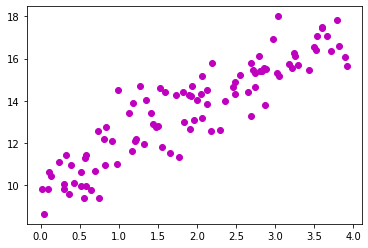

In [15]:
#Plot these points to get a feel of the distribution.
plt.plot(X, y, 'mo')
plt.show()

In [16]:
#Use a function which adds one to each instance
X_new = bias_column(X)

print(X[:5])
print(" ---- ")
print(X_new[:5])

[[3.43460654]
 [2.97551691]
 [2.13317222]
 [1.55448392]
 [1.2230974 ]]
 ---- 
[[1.         3.43460654]
 [1.         2.97551691]
 [1.         2.13317222]
 [1.         1.55448392]
 [1.         1.2230974 ]]


In [17]:

#Calculate the weights with the LeastSquaresRegression class
model = LeastSquaresRegression()
model.fit(X_new, y)
print(model.theta_)

[[9.98998053]
 [1.87713316]]


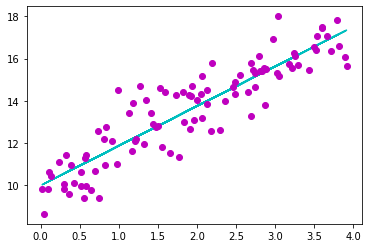

In [18]:
#Use your model to predict values from X and plot the two set of points superimposed
y_new = model.predict(X_new)
my_plot(X, y, y_new)

In [19]:

#Use the the gradient descent optimizer to try to find the best theta value
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.50928557 5.42855687]
Value of f at this theta: f(theta) = 3.567347909825836
Value of f prime at this theta: f'(theta) = [-0.98142886 -1.14288627]


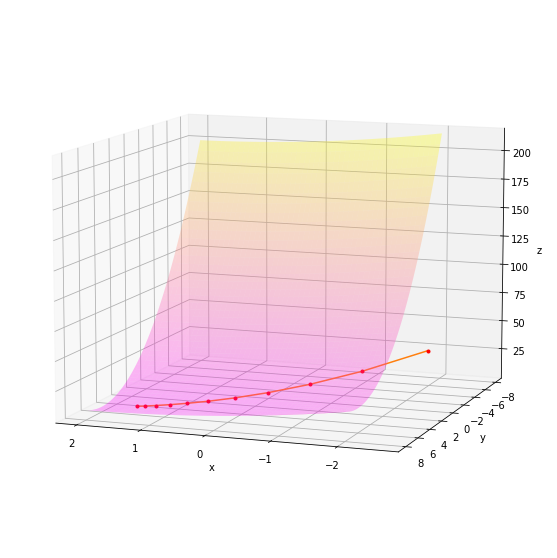

In [20]:
#Plot the function f in 3D

#Plot the progression of the gradient by using the history variable inside the class

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.view_init(10, 110)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

X = np.linspace(-2, 2, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y)
Z = 3 + (X-2)**2 + (Y-6)**2

ax.plot_surface(X, Y, Z, cmap="spring", alpha=0.3, rstride = 2, cstride = 2)
ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], [f(t) for t in grad.history_] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=3)

plt.show()

In [21]:
#Implement the batch gradient descent
theta_start = np.random.randn(2,1)
theta = gradient_descent(X_new, 100, y_new, theta_start)
print(theta)

[[9.90372573]
 [1.91246837]]


In [22]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)
X_new = bias_column(X)
#theta_start = np.random.randn(2,1)

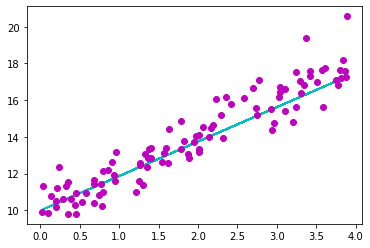

[[5.14101367]
 [3.97288033]]


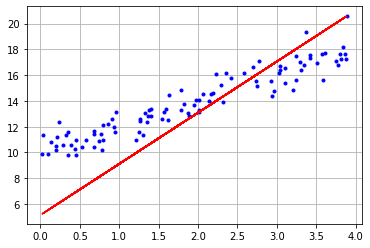

In [23]:

#Use your model to predict values from X and plot the two set of points superimposed
y_new = model.predict(X_new)
my_plot(X, y, y_new)#learning rate of 0.01
plot_line(0.01)


[[9.9276472 ]
 [2.06623071]]


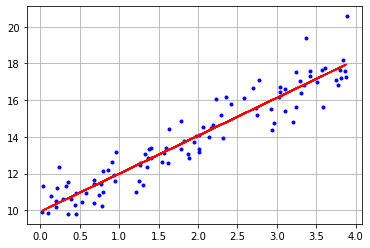

In [24]:
#learning rate of 0.1
plot_line(0.1)

[[-2.43528941e+85]
 [-6.11366776e+85]]


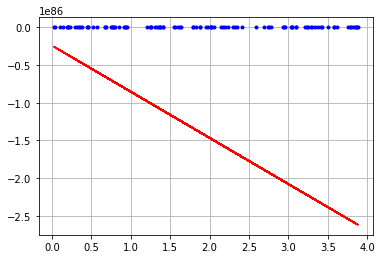

In [25]:
#learning rate of 0.7
plot_line(0.7)